In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
from global_values import *
from tqdm import tqdm

# Histograme pe toate imaginile

## Scor simplu

100%|██████████| 3/3 [00:00<00:00, 393.79it/s]


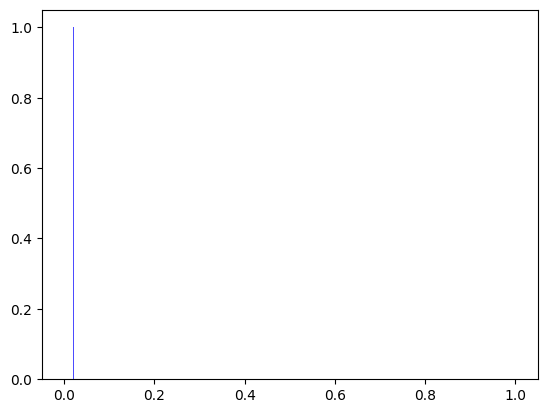

In [2]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)
    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.score <= 0.2:
            if s.is_valid_match:
                is_match_scores.append(s.score)
            else:
                is_not_match_scores.append(s.score)
            
plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
# plt.yscale('log')
plt.show()

100%|██████████| 3/3 [00:00<00:00, 625.27it/s]


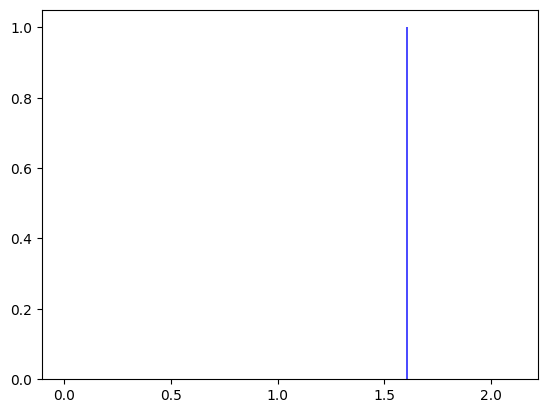

In [3]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.score < 5 and s.score >0.2:
            if s.is_valid_match:
                is_match_scores.append(s.score)
            else:
                is_not_match_scores.append(s.score)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
# plt.yscale('log')
plt.show()

100%|██████████| 3/3 [00:00<00:00, 927.94it/s]


0


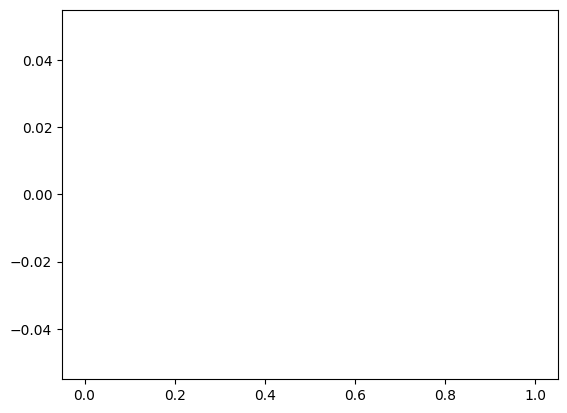

0


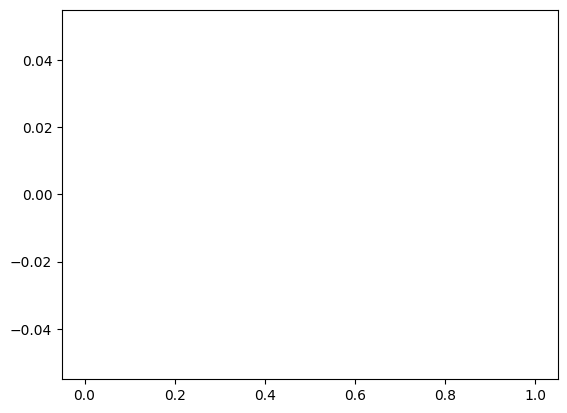

0


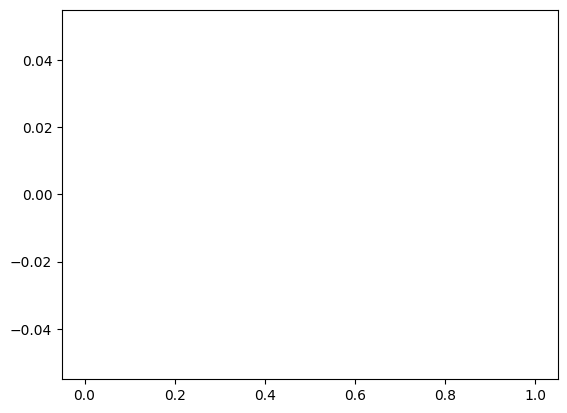

0


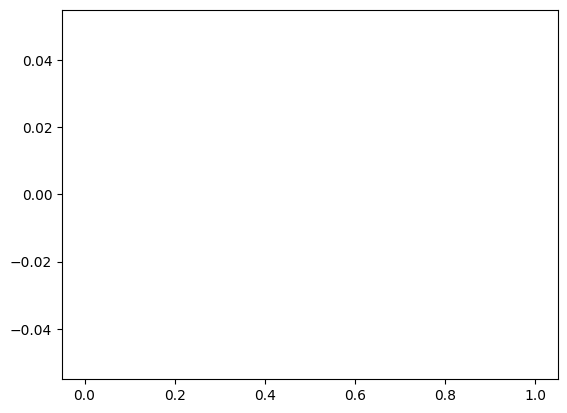

0


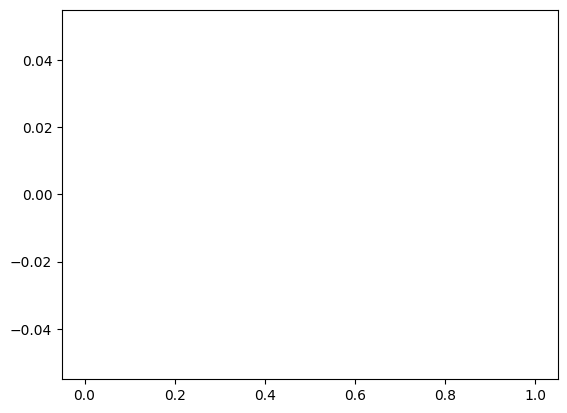

0


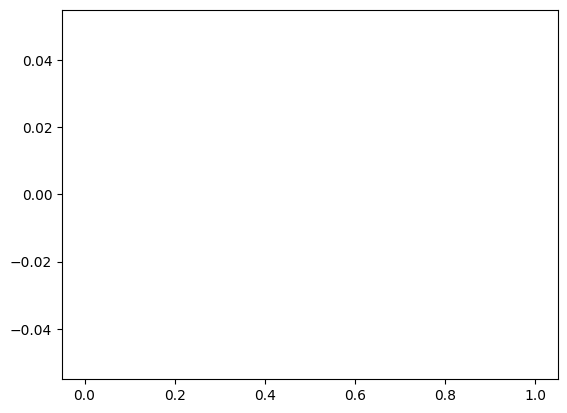

0


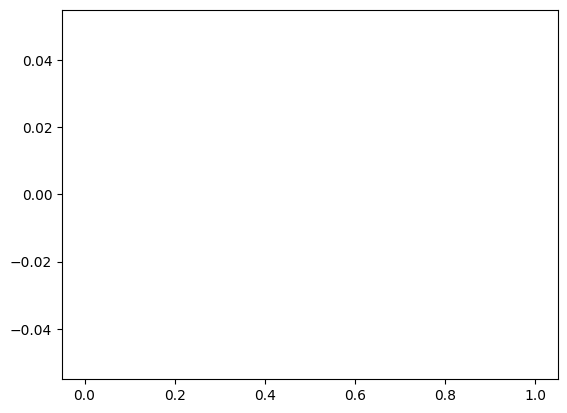

0


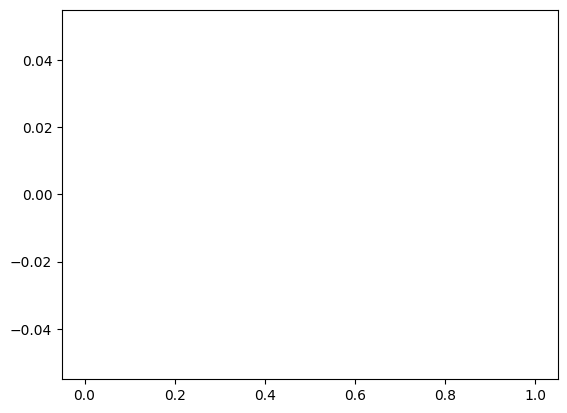

0


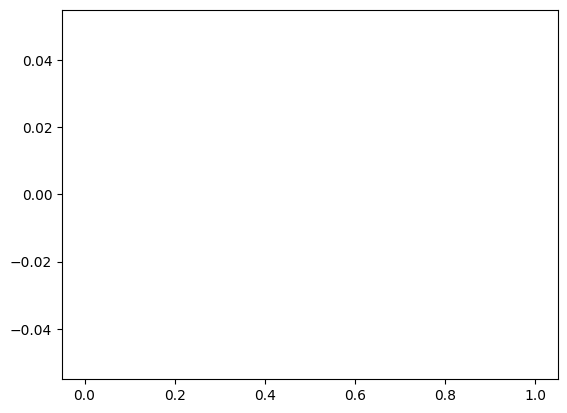

0


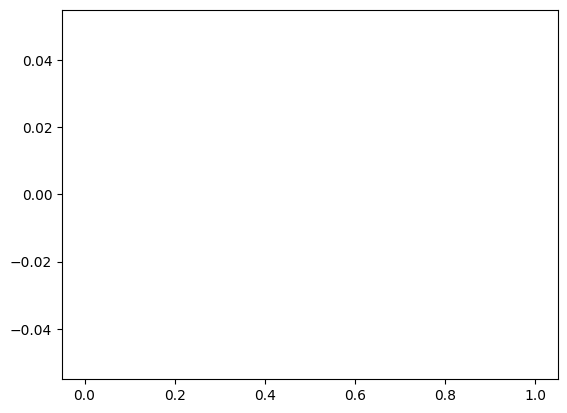

0


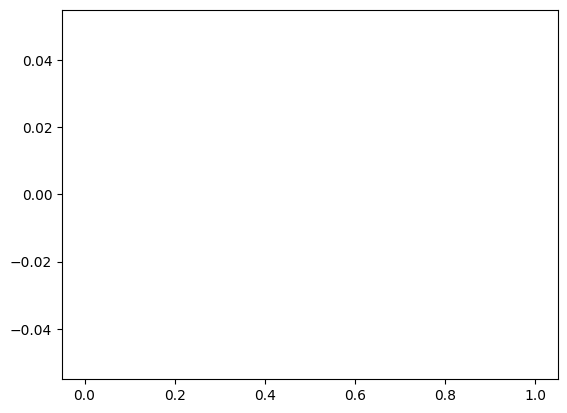

0


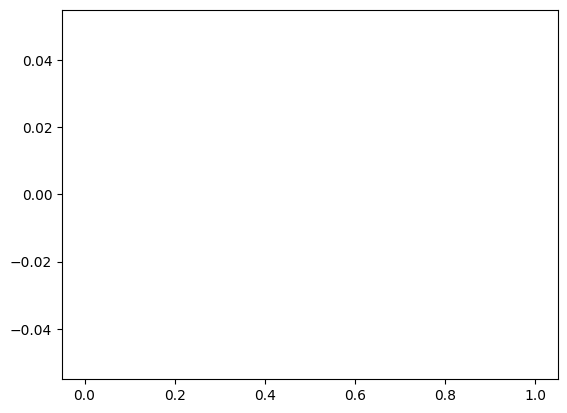

0


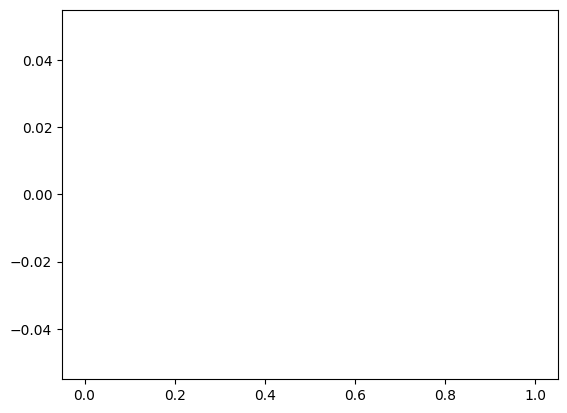

0


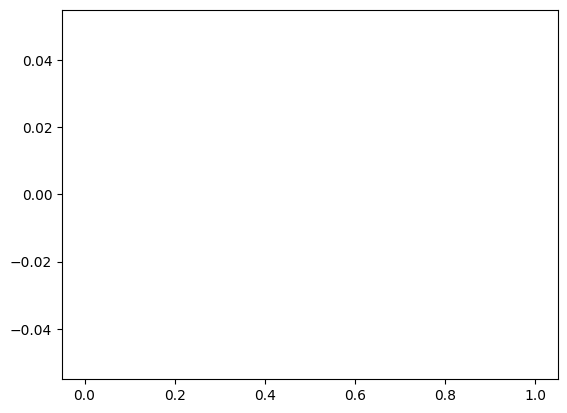

0


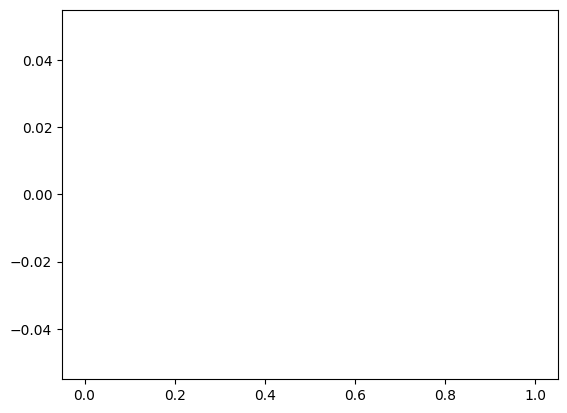

0


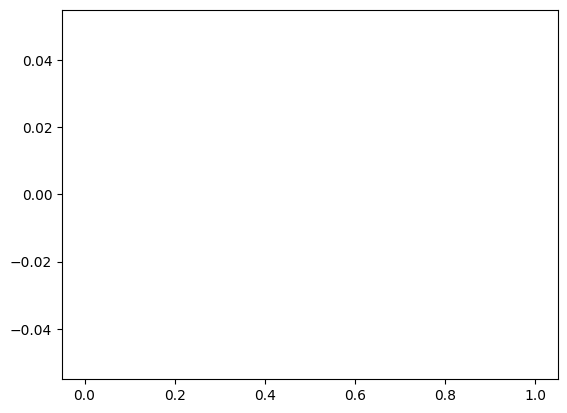

In [4]:

path = os.path.join("disney_puzzle","aladin.jpg")
output_folder = "fragments"

fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
sides_comparisons = create_sides_comparisons(fragments)
for fr in fragments:
    for side in fr.sides:
        is_match_scores = []
        is_not_match_scores = []
        total_comp = 0
        for s in sides_comparisons:
            if side == s.side1 or side == s.side2:
                if s.score < 1:
                    total_comp += 1
                    if s.is_valid_match:
                        is_match_scores.append(s.score)
                    else:
                        is_not_match_scores.append(s.score)
        print(total_comp)
        plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
        plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
        # plt.yscale('log')
        plt.show()

## Color Score

100%|██████████| 3/3 [00:00<00:00, 406.70it/s]


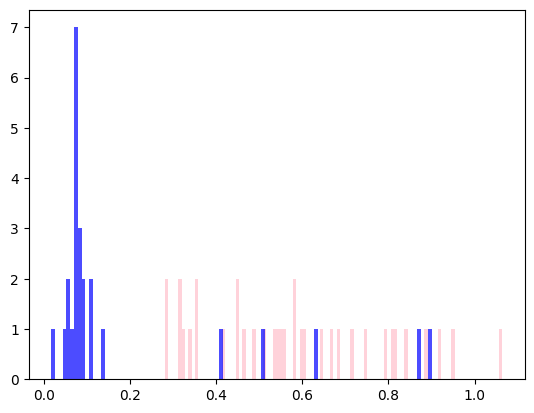

In [5]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.is_valid_match:
            is_match_scores.append(s.color_score)
        else:
            is_not_match_scores.append(s.color_score)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
# plt.yscale('log')
plt.show()

# Grad Score

100%|██████████| 3/3 [00:00<00:00, 667.81it/s]


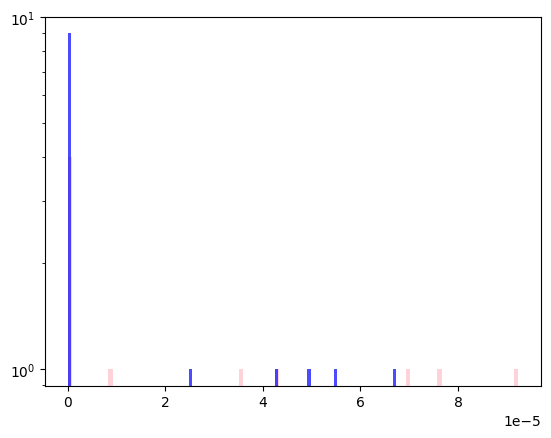

In [6]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.grad_match < 0.002:
            if s.is_valid_match:
                is_match_scores.append(s.grad_score)
            else:
                is_not_match_scores.append(s.grad_score)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
plt.yscale('log')
plt.show()

# Gradient Presence

100%|██████████| 3/3 [00:00<00:00, 693.69it/s]


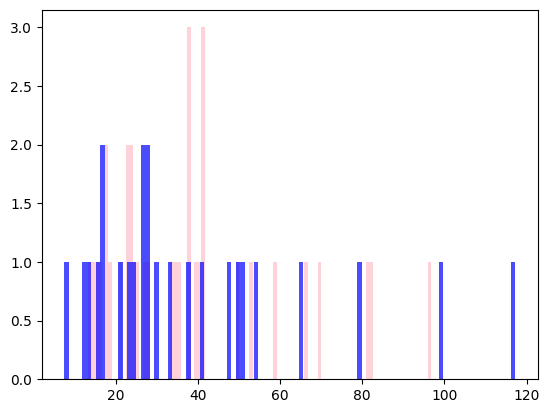

In [7]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.is_valid_match:
            is_match_scores.append(s.grad_presence)
        else:
            is_not_match_scores.append(s.grad_presence)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
# plt.yscale('log')
plt.show()

# Merged pices grad

In [8]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)

    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.is_valid_match:
            is_match_scores.append(s.merged_grad_score)
        else:
            is_not_match_scores.append(s.merged_grad_score)

plt.hist(is_not_match_scores, bins=100, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=100, alpha=0.7, color='blue')
# plt.yscale('log')
plt.show()

100%|██████████| 3/3 [00:00<00:00, 533.83it/s]


AttributeError: 'SidesComparison' object has no attribute 'merged_grad_score'

## Impartit la varianta imaginii

100%|██████████| 63/63 [00:02<00:00, 23.06it/s]


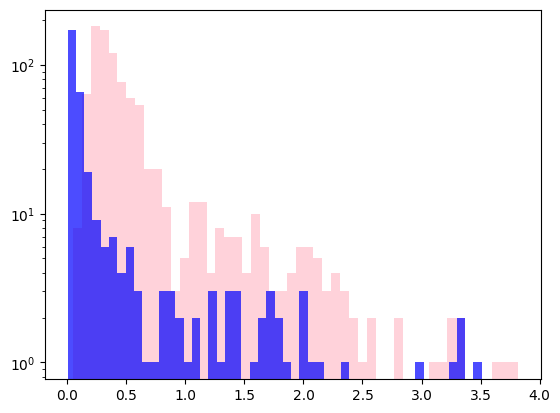

In [ ]:
output_folder = "fragments"

is_match_scores = []
is_not_match_scores = []

files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)
    image = cv.imread(path, cv.IMREAD_COLOR)  
    variance = np.var(image)

    fragments< _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)

    for s in sides_comparisons:
        if s.score < 1:
            if s.is_valid_match:
                is_match_scores.append(10000*s.score/variance)
            else:
                is_not_match_scores.append(10000*s.score/variance)

plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink')
plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue')
plt.yscale('log')
plt.show()

# Histograme pe o singura imagine

## Scor simplu

100%|██████████| 63/63 [00:00<00:00, 146.50it/s]


fr1: 20 side1:1 fr2: 21 side2:3 score: 0.0017563678528951657
fr1: 43 side1:2 fr2: 51 side2:0 score: 0.002259658595132757
fr1: 2 side1:1 fr2: 3 side2:3 score: 0.0031668466529212436
fr1: 21 side1:1 fr2: 22 side2:3 score: 0.0038461470554475366
fr1: 26 side1:1 fr2: 27 side2:3 score: 0.004224215648934254
fr1: 52 side1:1 fr2: 53 side2:3 score: 0.0042399387931704585
fr1: 1 side1:2 fr2: 9 side2:0 score: 0.004576869592032299
fr1: 41 side1:1 fr2: 42 side2:3 score: 0.005279791061303089
fr1: 1 side1:1 fr2: 2 side2:3 score: 0.005559241072353371
fr1: 0 side1:1 fr2: 1 side2:3 score: 0.006838483226563624
fr1: 3 side1:2 fr2: 11 side2:0 score: 0.006999466749428672
fr1: 10 side1:1 fr2: 11 side2:3 score: 0.007112238465580556
fr1: 22 side1:1 fr2: 23 side2:3 score: 0.007207497872924309
fr1: 14 side1:1 fr2: 15 side2:3 score: 0.007301615608072326
fr1: 33 side1:1 fr2: 34 side2:3 score: 0.007838859077535124
fr1: 40 side1:1 fr2: 41 side2:3 score: 0.008006420298329531
fr1: 58 side1:1 fr2: 59 side2:3 score: 0.0080

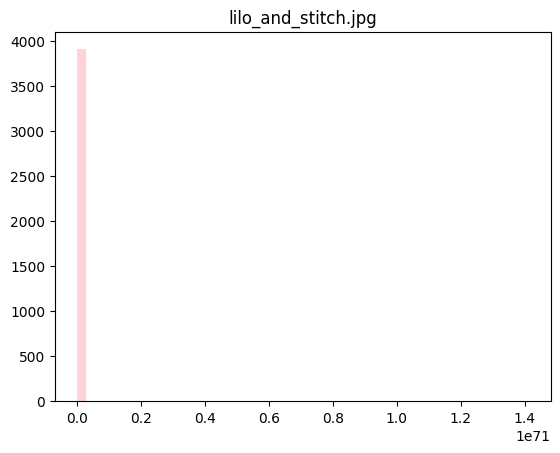

100%|██████████| 63/63 [00:00<00:00, 157.67it/s]


fr1: 62 side1:1 fr2: 63 side2:3 score: 0.0025882992597869255
fr1: 48 side1:1 fr2: 49 side2:3 score: 0.0027819648846303395
fr1: 18 side1:1 fr2: 19 side2:3 score: 0.003242625146911723
fr1: 8 side1:1 fr2: 9 side2:3 score: 0.003457414639827131
fr1: 0 side1:2 fr2: 8 side2:0 score: 0.0038552675969332766
fr1: 50 side1:2 fr2: 58 side2:0 score: 0.00428898846424664
fr1: 0 side1:1 fr2: 1 side2:3 score: 0.004497652422051744
fr1: 21 side1:2 fr2: 29 side2:0 score: 0.005113855242741157
fr1: 5 side1:2 fr2: 13 side2:0 score: 0.0052119902148268366
fr1: 54 side1:1 fr2: 55 side2:3 score: 0.005558664229430625
fr1: 30 side1:1 fr2: 31 side2:3 score: 0.005644043614586473
fr1: 27 side1:1 fr2: 28 side2:3 score: 0.005858028639729327
fr1: 42 side1:2 fr2: 50 side2:0 score: 0.005863779530043793
fr1: 35 side1:1 fr2: 36 side2:3 score: 0.0061776769659286105
fr1: 1 side1:2 fr2: 9 side2:0 score: 0.006292394185221336
fr1: 2 side1:1 fr2: 3 side2:3 score: 0.006341314098539809
fr1: 4 side1:2 fr2: 12 side2:0 score: 0.0064715

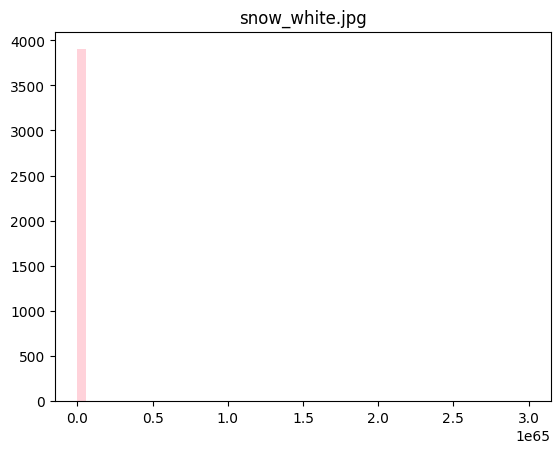

100%|██████████| 63/63 [00:00<00:00, 173.71it/s]


fr1: 10 side1:1 fr2: 11 side2:3 score: 0.002904773809229599
fr1: 29 side1:1 fr2: 30 side2:3 score: 0.006526177878725625
fr1: 25 side1:1 fr2: 26 side2:3 score: 0.006951110975360522
fr1: 30 side1:1 fr2: 31 side2:3 score: 0.0071304139250934154
fr1: 33 side1:1 fr2: 34 side2:3 score: 0.008443876982775616
fr1: 59 side1:1 fr2: 60 side2:3 score: 0.00868204439373819
fr1: 16 side1:1 fr2: 17 side2:3 score: 0.01131856259648522
fr1: 9 side1:2 fr2: 17 side2:0 score: 0.011742134605012399
fr1: 13 side1:2 fr2: 21 side2:0 score: 0.014138080936794131
fr1: 43 side1:1 fr2: 44 side2:3 score: 0.014966688261343616
fr1: 17 side1:1 fr2: 18 side2:3 score: 0.014990747434079165
fr1: 53 side1:1 fr2: 54 side2:3 score: 0.015308834864836808
fr1: 15 side1:2 fr2: 23 side2:0 score: 0.015558166989138414
fr1: 9 side1:1 fr2: 10 side2:3 score: 0.015806034859757324
fr1: 24 side1:1 fr2: 25 side2:3 score: 0.016540459436884408
fr1: 10 side1:2 fr2: 18 side2:0 score: 0.01813967405200398
fr1: 14 side1:2 fr2: 22 side2:0 score: 0.018

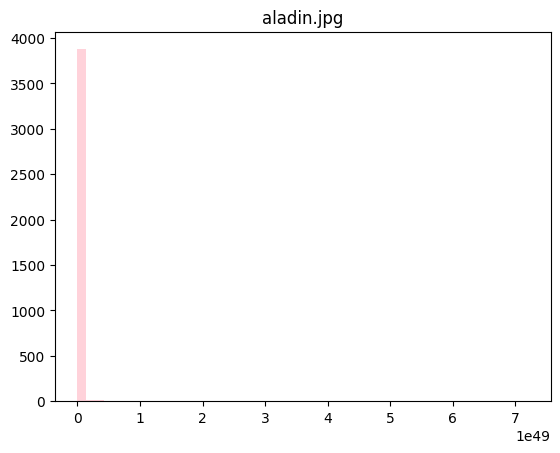

100%|██████████| 63/63 [00:00<00:00, 182.65it/s]


fr1: 32 side1:2 fr2: 40 side2:0 score: 0.001565652095297211
fr1: 62 side1:1 fr2: 63 side2:3 score: 0.002236849794306967
fr1: 55 side1:2 fr2: 63 side2:0 score: 0.0032153687973966545
fr1: 17 side1:1 fr2: 18 side2:3 score: 0.0035295450855272986
fr1: 61 side1:1 fr2: 62 side2:3 score: 0.0035629769790044507
fr1: 45 side1:1 fr2: 46 side2:3 score: 0.004074948067050352
fr1: 31 side1:2 fr2: 39 side2:0 score: 0.00486366828907809
fr1: 58 side1:1 fr2: 59 side2:3 score: 0.004930955110436966
fr1: 24 side1:1 fr2: 25 side2:3 score: 0.005886483865078359
fr1: 38 side1:2 fr2: 46 side2:0 score: 0.007281353173719913
fr1: 42 side1:1 fr2: 43 side2:3 score: 0.008681319263021355
fr1: 28 side1:1 fr2: 29 side2:3 score: 0.010320812650537135
fr1: 44 side1:2 fr2: 52 side2:0 score: 0.010954280735282916
fr1: 32 side1:1 fr2: 33 side2:3 score: 0.012746045143575128
fr1: 29 side1:2 fr2: 37 side2:0 score: 0.012822856315983585
fr1: 39 side1:2 fr2: 47 side2:0 score: 0.015572412024593823
fr1: 50 side1:2 fr2: 58 side2:0 score:

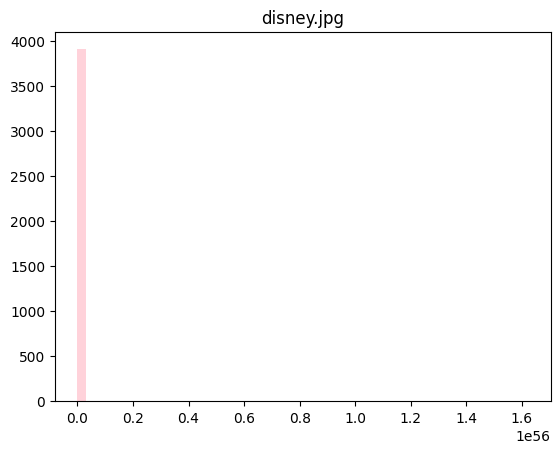

100%|██████████| 63/63 [00:00<00:00, 140.74it/s]


fr1: 17 side1:1 fr2: 18 side2:3 score: 0.0020602563692110436
fr1: 42 side1:2 fr2: 50 side2:0 score: 0.0027597568581142025
fr1: 9 side1:2 fr2: 17 side2:0 score: 0.0027807559963976465
fr1: 50 side1:2 fr2: 58 side2:0 score: 0.0032876195752033622
fr1: 10 side1:1 fr2: 11 side2:3 score: 0.0034428715003886243
fr1: 37 side1:1 fr2: 38 side2:3 score: 0.0034786110422125797
fr1: 0 side1:1 fr2: 1 side2:3 score: 0.003815948144965602
fr1: 5 side1:1 fr2: 6 side2:3 score: 0.004059106268776426
fr1: 26 side1:1 fr2: 27 side2:3 score: 0.004278797898794644
fr1: 21 side1:1 fr2: 22 side2:3 score: 0.004419745678186709
fr1: 1 side1:1 fr2: 2 side2:3 score: 0.004948446414171637
fr1: 2 side1:1 fr2: 3 side2:3 score: 0.0050968823745751145
fr1: 8 side1:1 fr2: 9 side2:3 score: 0.0052906363498862585
fr1: 9 side1:1 fr2: 10 side2:3 score: 0.005899072726720566
fr1: 51 side1:2 fr2: 59 side2:0 score: 0.006568372694627061
fr1: 49 side1:1 fr2: 50 side2:3 score: 0.006907672035904809
fr1: 16 side1:1 fr2: 17 side2:3 score: 0.007

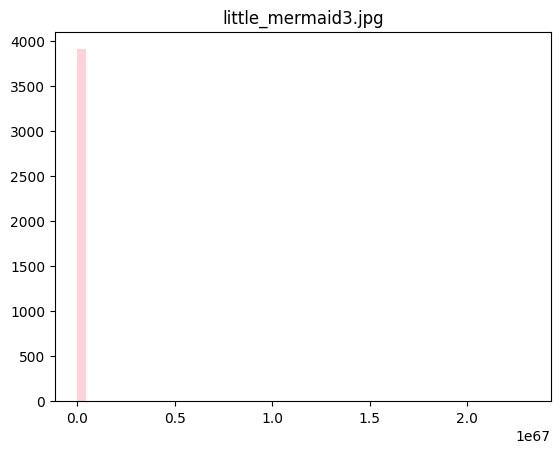

In [ ]:
output_folder = "fragments"



files = os.listdir("disney_puzzle")
for f in files:
    path = os.path.join("disney_puzzle",f)
    is_match_scores = []
    is_not_match_scores = []
    fragments, _, _ = divide_image(path, output_folder, COL_NR, ROW_NR)
    sides_comparisons = create_sides_comparisons(fragments)
    sorted_comp = sort_sides_comparisons(sides_comparisons)
    for s in sorted_comp:
        # if s.score < 0.2:
        print(f"fr1: {s.side1.fragment_idx} side1:{ s.side1.side_idx} fr2: {s.side2.fragment_idx} side2:{ s.side2.side_idx} score: {s.score}")

        if s.is_valid_match:
            is_match_scores.append(s.score)
        else:
            is_not_match_scores.append(s.score)

    plt.hist(is_not_match_scores, bins=50, alpha=0.7, color='pink')
    plt.hist(is_match_scores, bins=50, alpha=0.7, color='blue')
    plt.title(f)
    # plt.yscale('log')
    plt.show()